In [1]:
#pip install matplotlib
#pip install networkx
#pip install numpy

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicijalizacija mreže

Inicijalizacija neusmjerene mreže

In [3]:
G = nx.Graph()

Dodavanje čvorova

In [4]:
G.add_node(1)
G.add_node(2)
G.add_nodes_from([3,4,5])

Dodavanje veza

In [5]:
G.add_edge(1,2)
G.add_edges_from([(3,4),(2,4),(4,5),(3,5),(1,5)])

Ili kraće

In [74]:
G_con = nx.Graph([(1,2),(3,4),(2,4),(4,5),(3,5),(1,5)])

Graph with 5 nodes and 6 edges


Dodavanje i pristupanje atributima čvorova

In [7]:
nx.set_node_attributes(G, "vrijednost", "atribut")
print(nx.get_node_attributes(G, "atribut"))

{1: 'vrijednost', 2: 'vrijednost', 3: 'vrijednost', 4: 'vrijednost', 5: 'vrijednost'}


Pristupanje i dodavanje atributa pojedinom čvoru

In [8]:
G.nodes[1]["atribut"] = "nova vrijednost"
G.nodes[2]["atribut 2"] = "druga vrijednost"

Dodavanje atributa čvora rječnikom rječnika

In [9]:
node_attributes_dictionary = {1 : {"Atribut 1" : "Vrijednost 11"},
                         2 : {"Atribut 1" : "Vrijednost 12", "Atribut 2" : "Vrijednost 22"},
                         3 : {"Atribut 2" : "Vrijednost 23", "Atribut 1" : "Vrijednost 13"},
                         4 : {"Atribut 3" : "Vrijednost 34"}}

nx.set_node_attributes(G, node_attributes_dictionary)
print(nx.get_node_attributes(G, "Atribut 1"))

{1: 'Vrijednost 11', 2: 'Vrijednost 12', 3: 'Vrijednost 13'}


Dodavanje i pristupanje atributima vezama

In [10]:
nx.set_edge_attributes(G, "vrijednost", "atribut")
print(nx.get_edge_attributes(G, "atribut"))

{(1, 2): 'vrijednost', (1, 5): 'vrijednost', (2, 4): 'vrijednost', (3, 4): 'vrijednost', (3, 5): 'vrijednost', (4, 5): 'vrijednost'}


Pristupanje i dodavanje atributa pojedinoj vezi

In [11]:
G.edges[(1,2)]["atribut"] = "nova vrijednost"

Dodavanje atributa veza rječnikom rječnika

In [12]:
edge_attributes_dictionary = {(1,2) : {"Atribut 1" : "Vrijednost 112"},
                         (2,4) : {"Atribut 1" : "Vrijednost 122", "Atribut 2" : "Vrijednost 222"},
                         (4,5) : {"Atribut 2" : "Vrijednost 245", "Atribut 1" : "Vrijednost 145"},
                         (3,5) : {"Atribut 3" : "Vrijednost 335"}}

nx.set_edge_attributes(G, edge_attributes_dictionary)
print(nx.get_edge_attributes(G, "Atribut 1"))

{(1, 2): 'Vrijednost 112', (2, 4): 'Vrijednost 122', (4, 5): 'Vrijednost 145'}


Crtanje mreže

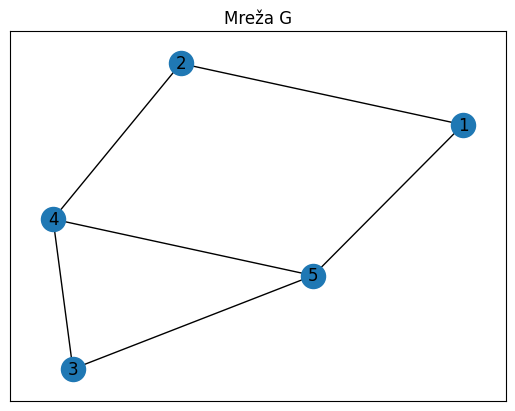

In [13]:
plt.title('Mreža G')
nx.draw_networkx(G)

Podešavanje parametara crtanja

In [14]:
pos = nx.spring_layout(G_con, k = 0.1, seed = 7)
node_labels = nx.get_node_attributes(G, 'atribut')

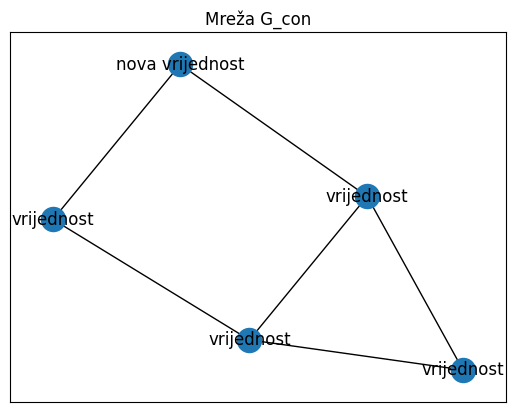

In [15]:
plt.title('Mreža G_con')
nx.draw_networkx(G_con, labels = node_labels, pos = pos)

Inicijalizacija usmjerene mreže

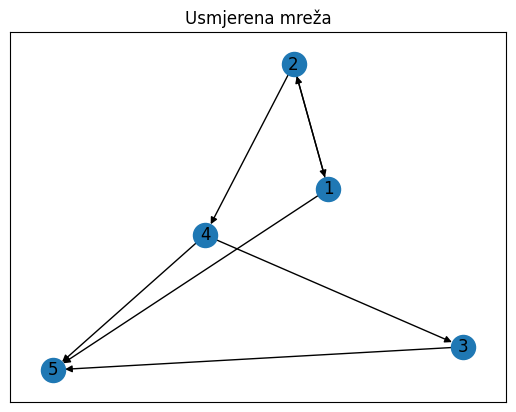

In [16]:
D = nx.DiGraph([(1,2),(2,1),(4,3),(2,4),(4,5),(3,5),(1,5)])

plt.title('Usmjerena mreža')
nx.draw_networkx(D)

Bipartitna mreža

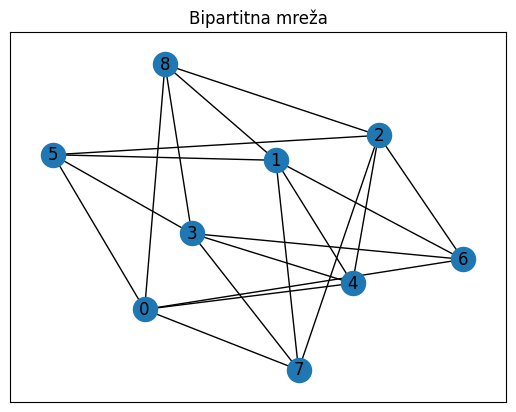

In [17]:
B = nx.complete_bipartite_graph(4,5)

plt.title('Bipartitna mreža')
nx.draw_networkx(B)

Ciklička mreža

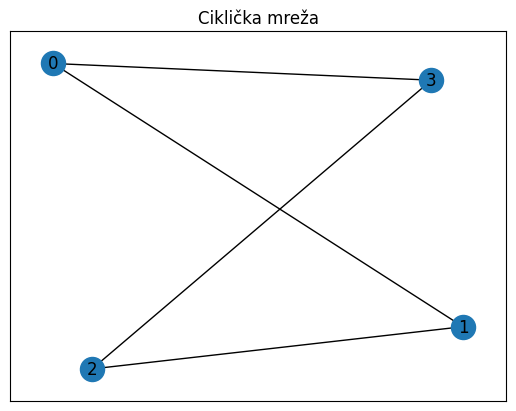

In [18]:
C = nx.cycle_graph(4)

plt.title('Ciklička mreža')
nx.draw_networkx(C)

Lanac

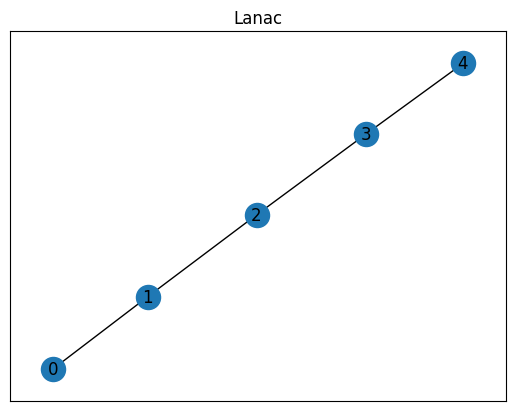

In [19]:
P = nx.path_graph(5)

plt.title('Lanac')
nx.draw_networkx(P)

Zvijezda

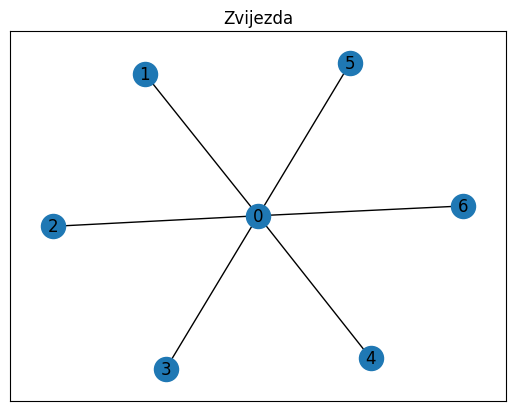

In [20]:
S = nx.star_graph(6)

plt.title('Zvijezda')
nx.draw_networkx(S)

Stablo

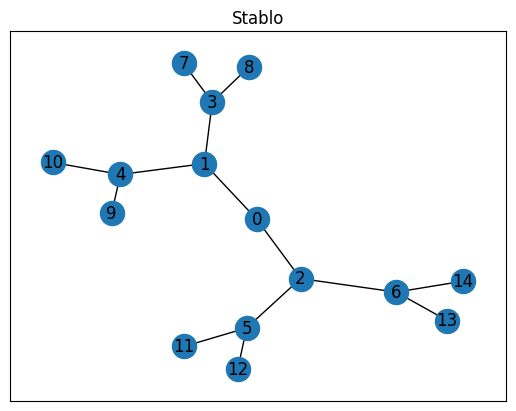

In [21]:
T = nx.generators.balanced_tree(2, h = 3)

plt.title('Stablo')
nx.draw_networkx(T)

Inicijalizacija mreže s težinama

In [22]:
D_w = nx.DiGraph()
D_w.add_weighted_edges_from([(1,2,3),(2,1,4),(4,3,1),(2,4,2),(4,5,2),(3,5,6),(1,5,1)])

Crtanje mreže s težinama

{(1, 2): Text(0.5806973734954295, 0.41840203075957694, '3'),
 (1, 5): Text(-0.3594032235551496, 0.4721594458914505, '1'),
 (2, 1): Text(0.5806973734954295, 0.41840203075957694, '4'),
 (2, 4): Text(0.6292943653698553, -0.29526161622853175, '2'),
 (4, 3): Text(-0.0806973734954293, -0.5412228547485811, '1'),
 (4, 5): Text(-0.31080623168072385, -0.2415042010966582, '2'),
 (3, 5): Text(-0.7698911418147054, -0.05407700567391481, '6')}

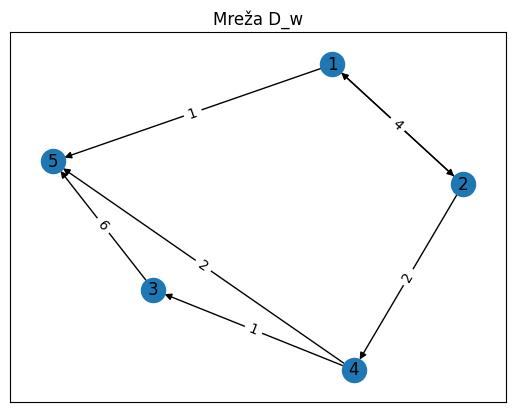

In [23]:
pos = nx.spring_layout(D_w, seed=7)
labels = nx.get_edge_attributes(D_w,'weight')

plt.title('Mreža D_w')
nx.draw_networkx(D_w,pos)
nx.draw_networkx_edge_labels(D_w, pos = pos, edge_labels = labels)

Prolazak po čvorovima i vezama

In [24]:
print(D_w.number_of_nodes())
print(D_w.number_of_edges())

5
7


In [25]:
print(D_w.nodes())
print(D_w.edges())

[1, 2, 4, 3, 5]
[(1, 2), (1, 5), (2, 1), (2, 4), (4, 3), (4, 5), (3, 5)]


In [26]:
for node in D_w.neighbors(4):
    print(node)

3
5


In [27]:
for node in D_w.predecessors(4):
    print(node)

2


In [28]:
for node in D_w.successors(4):
    print(node)

3
5


Podmreže

In [29]:
D_w_subgraph = nx.subgraph(D_w, (3,4,5))
D_w_subgraph_V2 = D_w.subgraph((3,4,5))

{(4, 3): Text(-0.49999999999999956, 0.17757760883570384, '1'),
 (4, 5): Text(0.05300934113393557, -0.07431828596791268, '2'),
 (3, 5): Text(0.4469906588660648, -0.10325932286779112, '6')}

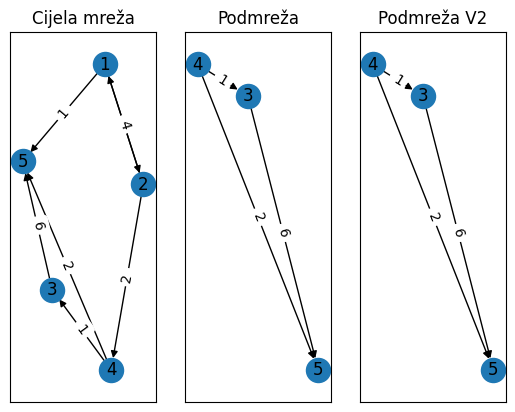

In [30]:
plt.subplot(131)
plt.title('Cijela mreža')
pos = nx.spring_layout(D_w, seed = 7)
labels = nx.get_edge_attributes(D_w, 'weight')
nx.draw_networkx(D_w, pos)
nx.draw_networkx_edge_labels(D_w, pos, labels)

plt.subplot(132)
plt.title('Podmreža')
pos = nx.spring_layout(D_w_subgraph, seed = 7)
labels = nx.get_edge_attributes(D_w_subgraph, 'weight')
nx.draw_networkx(D_w_subgraph, pos)
nx.draw_networkx_edge_labels(D_w_subgraph, pos, labels)

plt.subplot(133)
plt.title('Podmreža V2')
pos = nx.spring_layout(D_w_subgraph_V2, seed = 7)
labels = nx.get_edge_attributes(D_w_subgraph_V2, 'weight')
nx.draw_networkx(D_w_subgraph_V2, pos)
nx.draw_networkx_edge_labels(D_w_subgraph_V2, pos, labels)

Klike

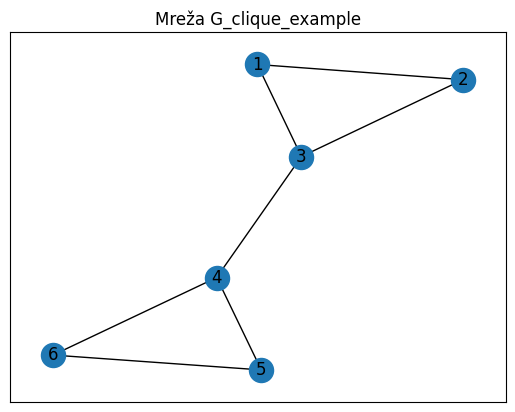

In [31]:
G_clique_example = nx.Graph([(1,2),(1,3),(2,3),(3,4),(4,5),(4,6),(5,6)])

plt.title('Mreža G_clique_example')
nx.draw_networkx(G_clique_example, pos = nx.spring_layout(G_clique_example, seed = 7))

[3, 1, 2]
[3, 4]
[5, 4, 6]


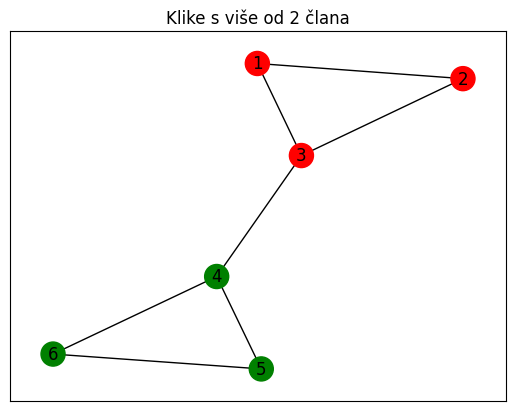

In [32]:
G_cliques = nx.find_cliques(G_clique_example)


clique_n = 0
clique_colors = ['red', 'green']
for clique in G_cliques:
    print(clique)
    if len(clique) > 2:
        nx.set_node_attributes(G_clique_example.subgraph(clique), clique_colors[clique_n], "color")
        clique_n+=1
        
plt.title('Klike s više od 2 člana')
nx.draw_networkx(G_clique_example,  node_color = list(nx.get_node_attributes(G_clique_example, "color").values()), pos = nx.spring_layout(G_clique_example, seed = 7))

Gustoća

In [33]:
print(f"Gustoća mreže G : {nx.density(G)}")
print(f"Gustoća mreže D_w : {nx.density(D_w)}")

Gustoća mreže G : 0.6
Gustoća mreže D_w : 0.35


Stupanj čvora

Stupanj čvora 4 mreže G : 3
Stupnjevi svih čvorova mreže G : [(1, 2), (2, 2), (3, 2), (4, 3), (5, 3)]


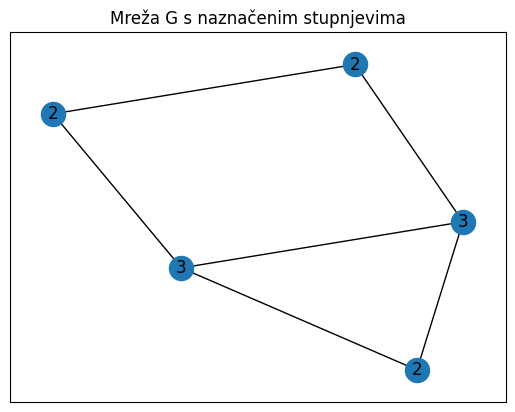

In [34]:
print(f"Stupanj čvora 4 mreže G : {G.degree(4)}")
print(f"Stupnjevi svih čvorova mreže G : {G.degree()}")

G_nodes_degrees = G.degree()
nx.set_node_attributes(G, dict(G_nodes_degrees), "degree")

plt.title('Mreža G s naznačenim stupnjevima')
nx.draw_networkx(G, labels = nx.get_node_attributes(G, "degree"), pos = nx.spring_layout(G, seed = 7))

Stupanj čvora za usmjerene mreže

Stupanj čvora 4 mreže D : 3
Ulazni stupanj čvora 4 mreže D : 1
Izlazni stupanj čvora 4 mreže D : 2
Stupnjevi svih čvorova mreže D : [(1, 3), (2, 3), (4, 3), (3, 2), (5, 3)]
Ulazni stupnjevi svih čvorova mreže D : [(1, 1), (2, 1), (4, 1), (3, 1), (5, 3)]
Izlazni stupnjevi svih čvorova mreže D : [(1, 2), (2, 2), (4, 2), (3, 1), (5, 0)]


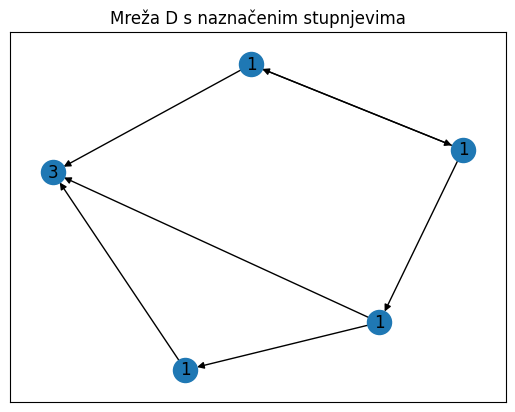

In [35]:
print(f"Stupanj čvora 4 mreže D : {D.degree(4)}")
print(f"Ulazni stupanj čvora 4 mreže D : {D.in_degree(4)}")
print(f"Izlazni stupanj čvora 4 mreže D : {D.out_degree(4)}")
print(f"Stupnjevi svih čvorova mreže D : {D.degree()}")
print(f"Ulazni stupnjevi svih čvorova mreže D : {D.in_degree()}")
print(f"Izlazni stupnjevi svih čvorova mreže D : {D.out_degree()}")

D_nodes_degrees = D.in_degree()
nx.set_node_attributes(D, dict(D_nodes_degrees), "in_degree")

plt.title('Mreža D s naznačenim stupnjevima')
nx.draw_networkx(D, labels = nx.get_node_attributes(D, "in_degree"), pos = nx.spring_layout(D, seed = 7))

Prosječni stupanj čvora

In [36]:
total_nodes = D.number_of_nodes()

total_degree = 0
total_in_degree = 0
total_out_degree = 0

for (node, degree) in D.degree():
    total_degree += degree
    
for (node, in_degree) in D.in_degree():
    total_in_degree += in_degree
    
for (node, out_degree) in D.out_degree():
    total_out_degree += out_degree
    
    
print(f"Prosječni stupanj čvora : {total_degree/total_nodes}")
print(f"Prosječni ulazni stupanj čvora : {total_in_degree/total_nodes}")
print(f"Prosječni izlazni stupanj čvora : {total_out_degree/total_nodes}")

Prosječni stupanj čvora : 2.8
Prosječni ulazni stupanj čvora : 1.4
Prosječni izlazni stupanj čvora : 1.4


Mrežna reprezentacija

In [37]:
print(f"Lista susjedstva za mrežu G : \n {list(nx.generate_adjlist(G))}")
print(f"Matrica susjedstva za mrežu G : \n {nx.adjacency_matrix(G).todense()}")
print(f"Lista veza za mrežu G :  \n {list(nx.generate_edgelist(G))}")

Lista susjedstva za mrežu G : 
 ['1 2 5', '2 4', '3 4 5', '4 5', '5']
Matrica susjedstva za mrežu G : 
 [[0 1 0 0 1]
 [1 0 0 1 0]
 [0 0 0 1 1]
 [0 1 1 0 1]
 [1 0 1 1 0]]
Lista veza za mrežu G :  
 ["1 2 {'atribut': 'nova vrijednost', 'Atribut 1': 'Vrijednost 112'}", "1 5 {'atribut': 'vrijednost'}", "2 4 {'atribut': 'vrijednost', 'Atribut 1': 'Vrijednost 122', 'Atribut 2': 'Vrijednost 222'}", "3 4 {'atribut': 'vrijednost'}", "3 5 {'atribut': 'vrijednost', 'Atribut 3': 'Vrijednost 335'}", "4 5 {'atribut': 'vrijednost', 'Atribut 2': 'Vrijednost 245', 'Atribut 1': 'Vrijednost 145'}"]


In [38]:
print(f"Lista susjedstva za mrežu D_w : \n {list(nx.generate_adjlist(D_w))}")
print(f"Matrica susjedstva za mrežu D_w : \n {nx.adjacency_matrix(D_w).todense()}")
print(f"Lista veza za mrežu D_w :  \n {list(nx.generate_edgelist(D_w))}")

Lista susjedstva za mrežu D_w : 
 ['1 2 5', '2 1 4', '4 3 5', '3 5', '5']
Matrica susjedstva za mrežu D_w : 
 [[0 3 0 0 1]
 [4 0 2 0 0]
 [0 0 0 1 2]
 [0 0 0 0 6]
 [0 0 0 0 0]]
Lista veza za mrežu D_w :  
 ["1 2 {'weight': 3}", "1 5 {'weight': 1}", "2 1 {'weight': 4}", "2 4 {'weight': 2}", "4 3 {'weight': 1}", "4 5 {'weight': 2}", "3 5 {'weight': 6}"]


Spremanje i učitavanje mreža pomoću liste veza

In [39]:
nx.write_edgelist(D_w, 'D_w.edgelist')
with open('D_w.edgelist') as f:
    head =[next(f) for x in range(5)]
print(head)
D_w_copy = nx.read_edgelist('D_w.edgelist')

["1 2 {'weight': 3}\n", "1 5 {'weight': 1}\n", "2 1 {'weight': 4}\n", "2 4 {'weight': 2}\n", "4 3 {'weight': 1}\n"]


# Primjeri mreža

Dodatni primjeri dostupni na: <br>
https://snap.stanford.edu/data/ <br>
http://vlado.fmf.uni-lj.si/pub/networks/data/

Članova karate kluba

In [40]:
G_karate = nx.karate_club_graph()
print(f"Broj čvorova : {G_karate.number_of_nodes()}")
print(f"Broj rubova : {G_karate.number_of_edges()}")

Broj čvorova : 34
Broj rubova : 78


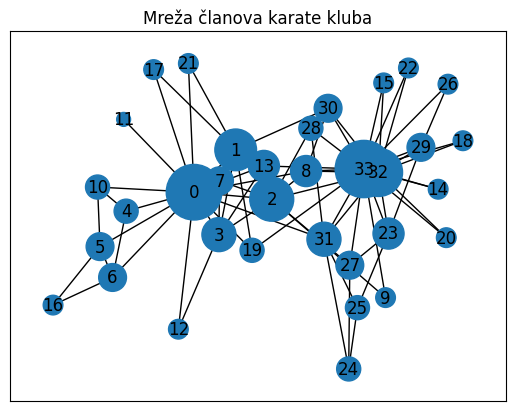

In [41]:
plt.title('Mreža članova karate kluba')
nx.draw_networkx(G_karate, node_size = [v * 100 for v in dict(G_karate.degree).values()], pos = nx.spring_layout(G_karate, seed = 7))

Mreža interakcije proteina

In [42]:
G_protein = nx.read_edgelist('protein_interaction.edgelist')
d = dict(G_protein.degree)
print(f"Broj čvorova : {G_protein.number_of_nodes()}")
print(f"Broj rubova : {G_protein.number_of_edges()}")

Broj čvorova : 20
Broj rubova : 102


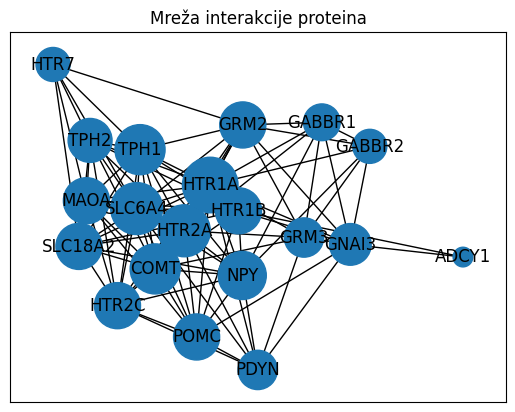

In [43]:
plt.title('Mreža interakcije proteina')
nx.draw_networkx(G_protein, node_size = [v*100 for v in d.values()],pos = nx.spring_layout(G_protein, seed = 7))

Peer-to-peer mreža

In [44]:
G_network = nx.read_edgelist('p2p-Gnutella08.txt')
print(f"Broj čvorova : {G_network.number_of_nodes()}")
print(f"Broj rubova : {G_network.number_of_edges()}")

Broj čvorova : 6301
Broj rubova : 20777


Provjera povezanosti mreže i dobivanje dobivanje najveće komponente

In [45]:
print(f"Mreža je povezana? {nx.is_connected(G_network)}")

G_network_components = sorted([G_network.subgraph(c).copy() for c in nx.connected_components(G_network)], key= len, reverse = True)

for (index, network_components) in enumerate(G_network_components):
    print(f"Komponenta indexa {index} je povezana? {nx.is_connected(G_network_components[index])}")

Mreža je povezana? False
Komponenta indexa 0 je povezana? True
Komponenta indexa 1 je povezana? True


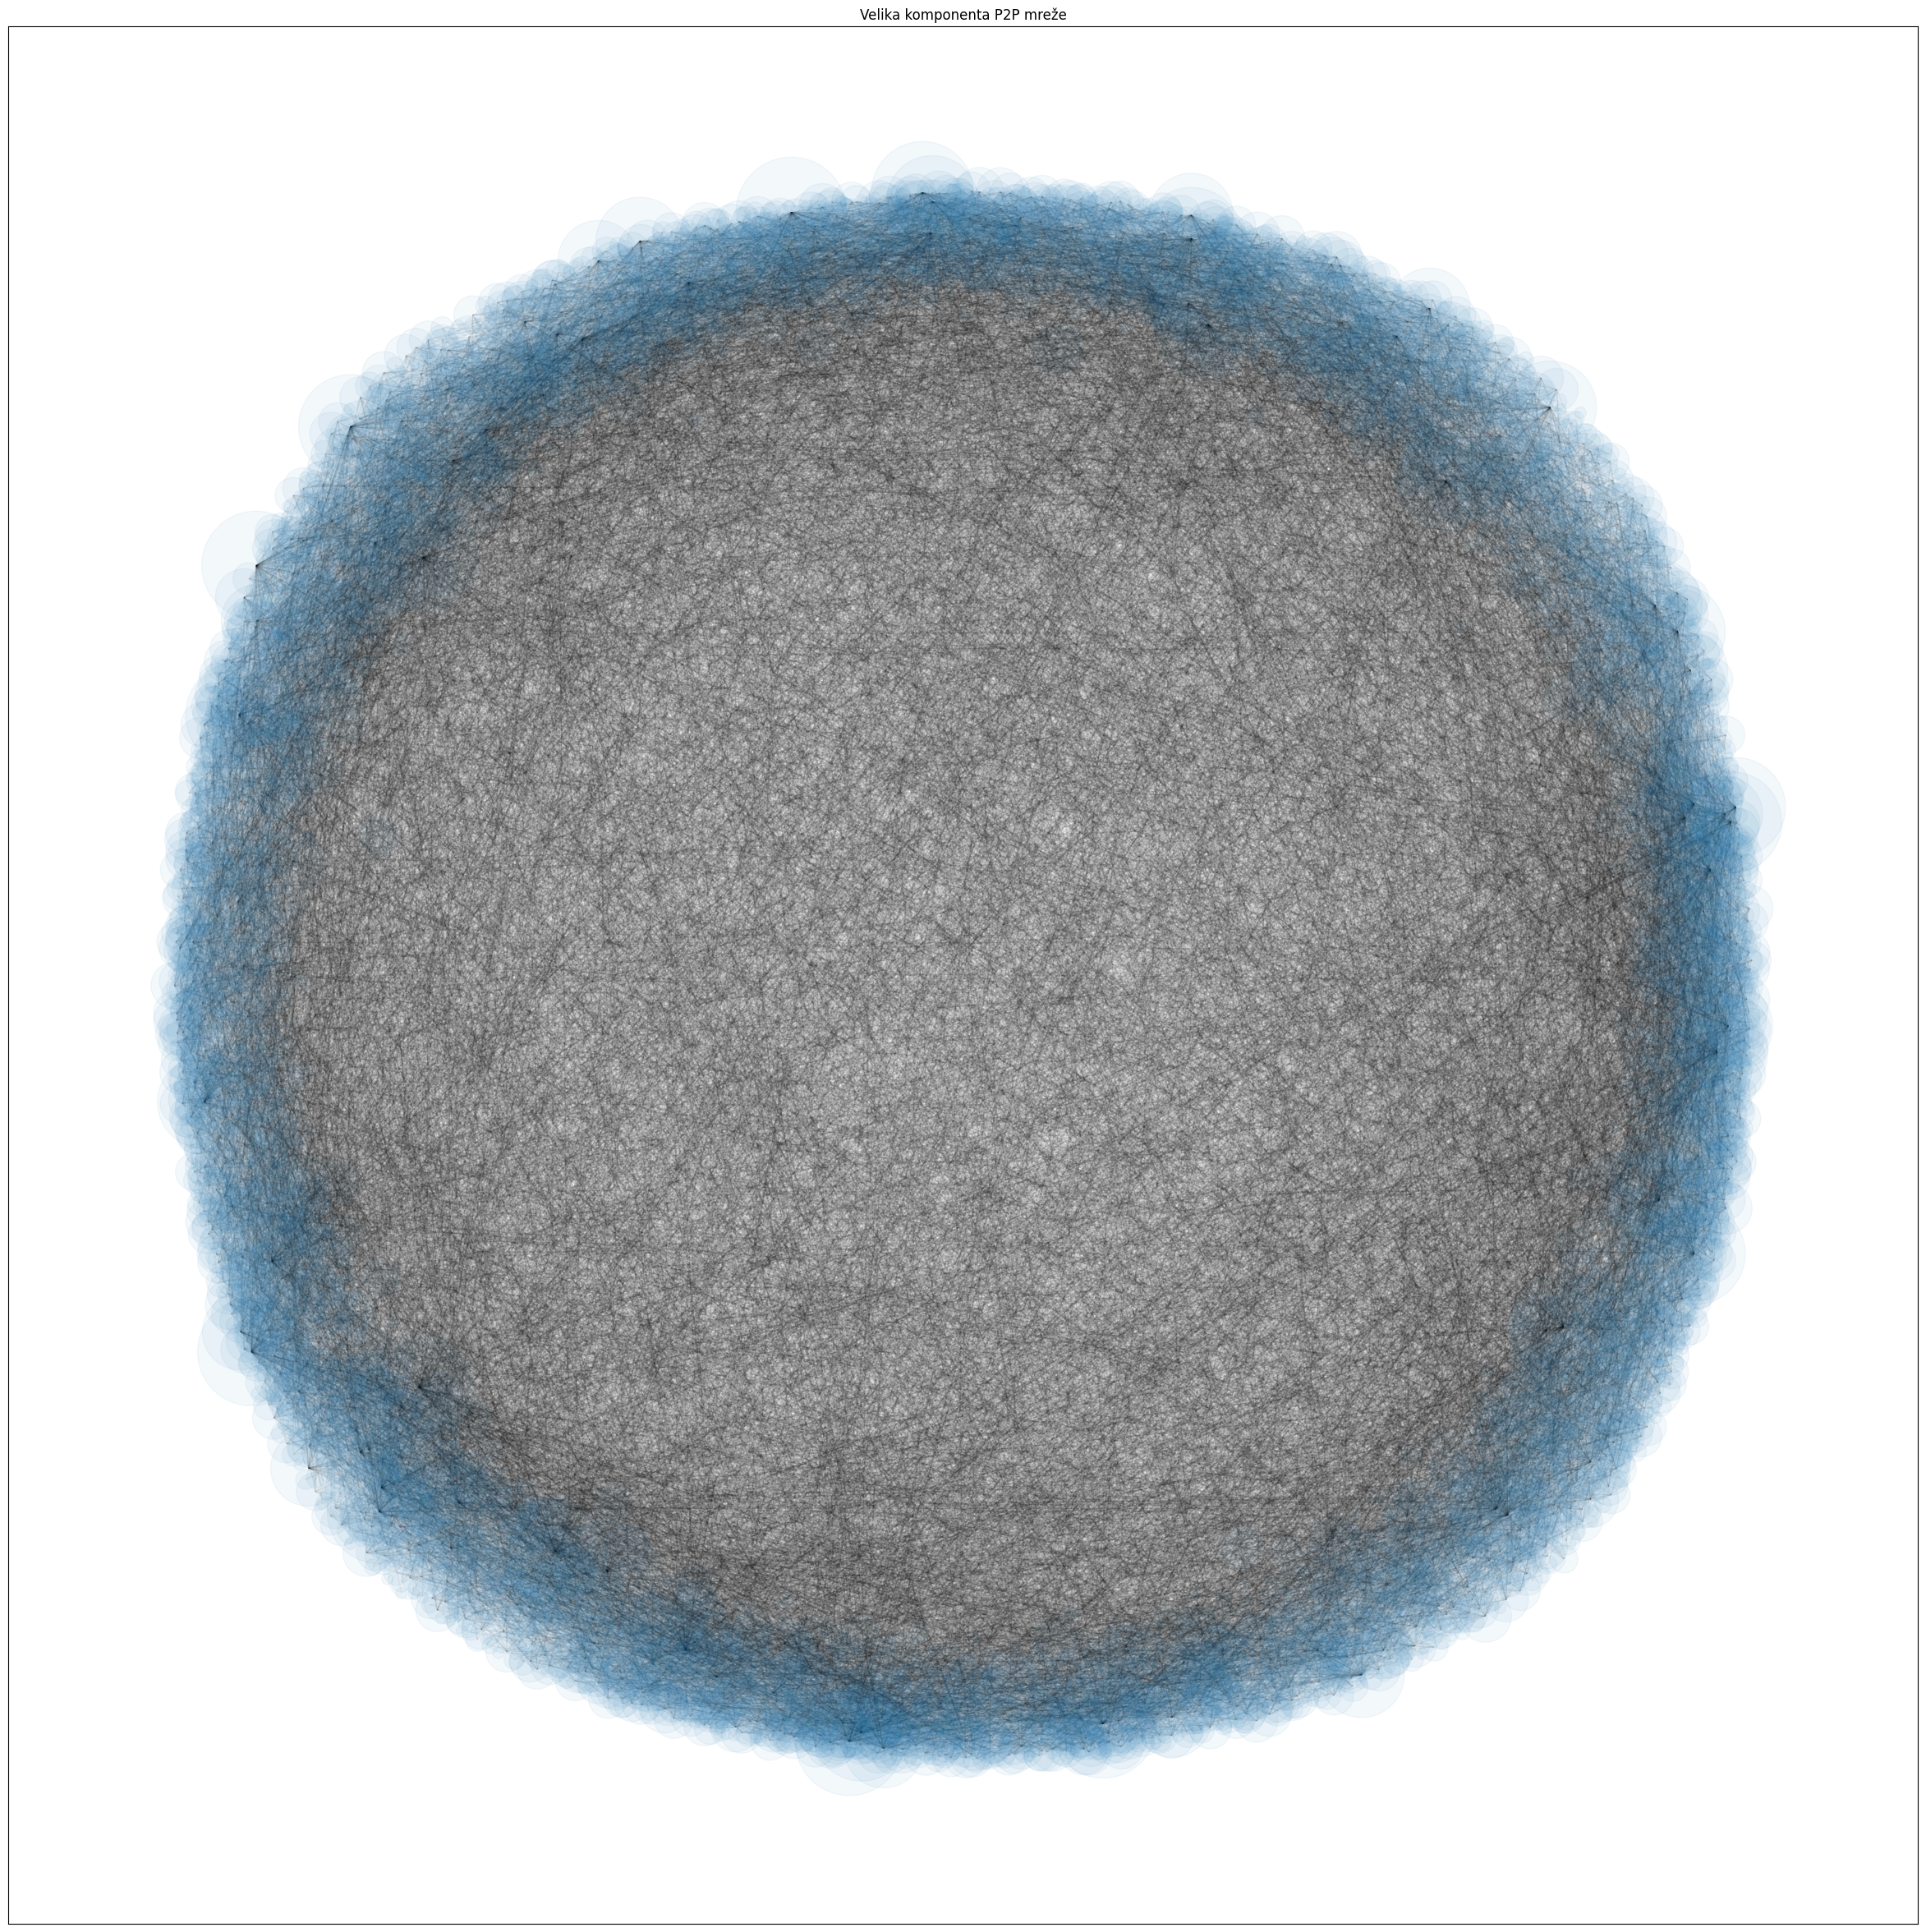

In [46]:
plt.figure(figsize = (30,30))
plt.title('Velika komponenta P2P mreže')
nx.draw_networkx(G_network_components[0], node_size = [v*100 for v in dict(G_network_components[0].degree).values()], pos = nx.spring_layout(G_network_components[0], k = 10) , alpha = 0.05, with_labels = False)

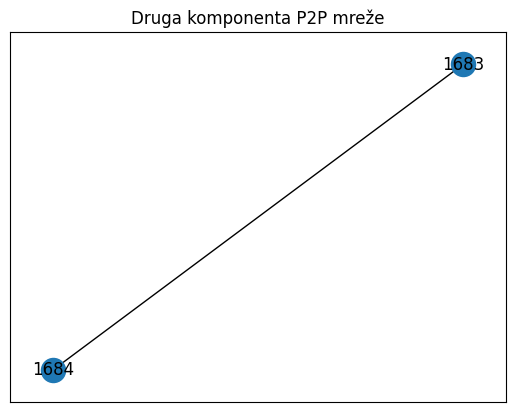

In [47]:
plt.title('Druga komponenta P2P mreže')
nx.draw_networkx(G_network_components[1], pos = nx.spring_layout(G_network_components[1], k = 0.1), node_size = 300)

Asortativnost

In [48]:
print(f"Asortativnost karate : {nx.degree_assortativity_coefficient(G_karate)}")
print(f"Asortativnost proteini : {nx.degree_assortativity_coefficient(G_protein)}")
print(f"Asortativnost P2P mreža : {nx.degree_assortativity_coefficient(G_network)}")

Asortativnost karate : -0.47561309768461413
Asortativnost proteini : 0.03130033632720205
Asortativnost P2P mreža : 0.03555037316941865


Prosječan najkraći put

In [49]:
print(f"Prosječan najkraći put karate : {nx.average_shortest_path_length(G_karate)}")
print(f"Prosječan najkraći put proteini : {nx.average_shortest_path_length(G_protein)}")
print(f"Prosječan najkraći put najveće komponente P2P mreže : {nx.average_shortest_path_length(G_network_components[0])}")

Prosječan najkraći put karate : 2.408199643493761
Prosječan najkraći put proteini : 1.4789473684210526
Prosječan najkraći put najveće komponente P2P mreže : 4.642991969318119


Dijametar

In [50]:
print(f"Dijametar karate : {nx.diameter(G_karate)}")
print(f"Dijametar proteini : {nx.diameter(G_protein)}")
print(f"Dijametar najveće komponente P2P mreže : {nx.diameter(G_network_components[0])}")

Dijametar karate : 5
Dijametar proteini : 3
Dijametar najveće komponente P2P mreže : 9


Koeficijent klasteriranja čvorova

In [51]:
print(f"Koeficijent klasteriranja čvorova karate : {nx.average_clustering(G_karate)}")
print(f"Koeficijent klasteriranja čvorova protein : {nx.average_clustering(G_protein)}")
print(f"Koeficijent klasteriranja čvorova mreža : {nx.average_clustering(G_network)}")

Koeficijent klasteriranja čvorova karate : 0.5706384782076823
Koeficijent klasteriranja čvorova protein : 0.7101214063714063
Koeficijent klasteriranja čvorova mreža : 0.010867921935819964


Breadth first search

Prolazak rubova BFS-om počevsi od čvora 0

In [52]:
for edge in nx.bfs_edges(G_karate, 0):
    print(edge)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 17)
(0, 19)
(0, 21)
(0, 31)
(1, 30)
(2, 9)
(2, 27)
(2, 28)
(2, 32)
(5, 16)
(8, 33)
(31, 24)
(31, 25)
(27, 23)
(32, 14)
(32, 15)
(32, 18)
(32, 20)
(32, 22)
(32, 29)
(33, 26)


Konstrukcija stabla pomoću BFS-a

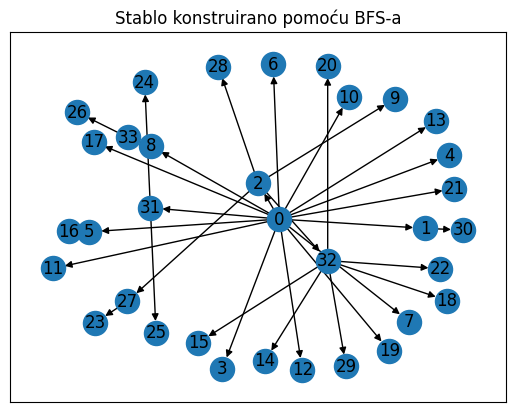

In [53]:
some = nx.bfs_tree(G_karate, 0)

plt.title('Stablo konstruirano pomoću BFS-a')
nx.draw_networkx(some)

Distribucija stupnja

In [54]:
def degree_calc(G):
    degrees = [val for (node, val) in G.degree()]
    avg_degree = np.mean(degrees)
    med_degree = np.median(degrees)
    
    return degrees, avg_degree, med_degree

In [55]:
def degree_distribution_plot(degree_list, avg_degree, med_degree, cumulative, title):
    plt.hist(degree_list,label='Distribucija stupnja', cumulative = cumulative)
    plt.axvline(avg_degree,color='r',linestyle='dashed',label='Prosječni stupanj')
    plt.axvline(med_degree,color='g',linestyle='dashed',label='Medijan stupanj')
    plt.legend()
    plt.ylabel('Postotak čvorova')
    plt.xlabel('Iznos stupnja')
    plt.title(title)    

In [56]:
d_list_karate, avg_d_karate, med_d_karate = degree_calc(G_karate)
d_list_protein, avg_d_protein, med_d_protein = degree_calc(G_protein)
d_list_mreza, avg_d_mreza, med_d_mreza = degree_calc(G_network)

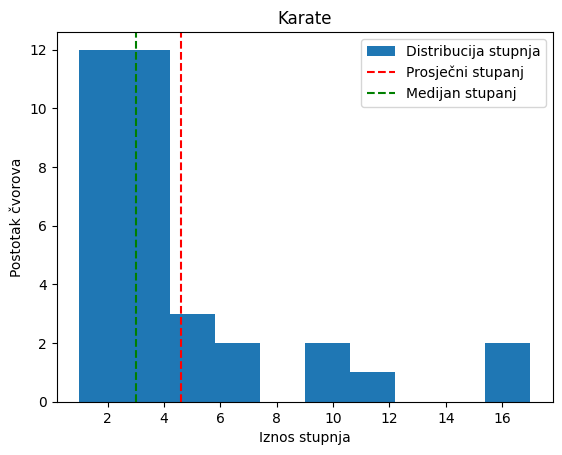

In [57]:
degree_distribution_plot(d_list_karate, avg_d_karate, med_d_karate, False, 'Karate')

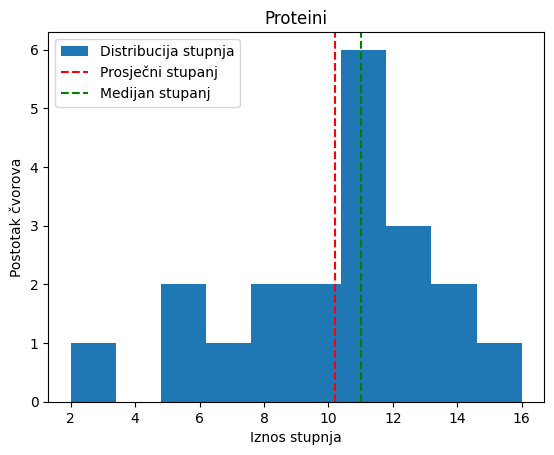

In [58]:
degree_distribution_plot(d_list_protein, avg_d_protein, med_d_protein, False, 'Proteini')

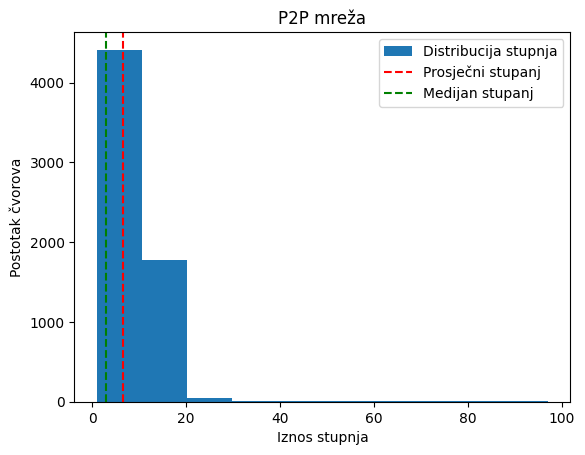

In [59]:
degree_distribution_plot(d_list_mreza, avg_d_mreza, med_d_mreza, False, 'P2P mreža')

Distribucija bliskosti

In [60]:
def closeness_calc(G):
    closeness = [val for (node, val) in nx.closeness_centrality(G).items()]
    avg_closeness = np.mean(closeness)
    med_closeness = np.median(closeness)
    
    return closeness, avg_closeness, med_closeness

In [61]:
def closeness_distribution_plot(closeness_list, avg_closeness, med_closeness, cumulative, title):
    plt.hist(closeness_list,label='Distribucija bliskosti', cumulative = cumulative)
    plt.axvline(avg_closeness, color='r' ,linestyle='dashed', label = "Prosječna bliskost")
    plt.axvline(med_closeness, color='g' ,linestyle='dashed', label = "Medijan bliskosti")
    plt.legend()
    plt.ylabel('Postotak čvorova')
    plt.xlabel('Iznost bliskosti')
    plt.title(title)    

In [62]:
c_list_karate, avg_c_karate, med_c_karate = closeness_calc(G_karate)
c_list_protein, avg_c_protein, med_c_protein = closeness_calc(G_protein)
c_list_mreza, avg_c_mreza, med_c_mreza = closeness_calc(G_network)

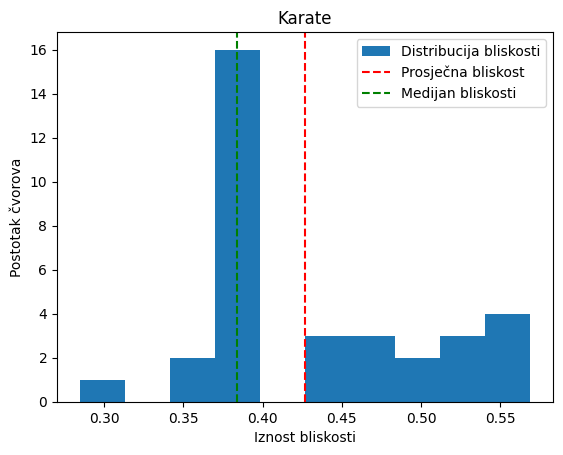

In [63]:
closeness_distribution_plot(c_list_karate, avg_c_karate, med_c_karate, False, 'Karate')

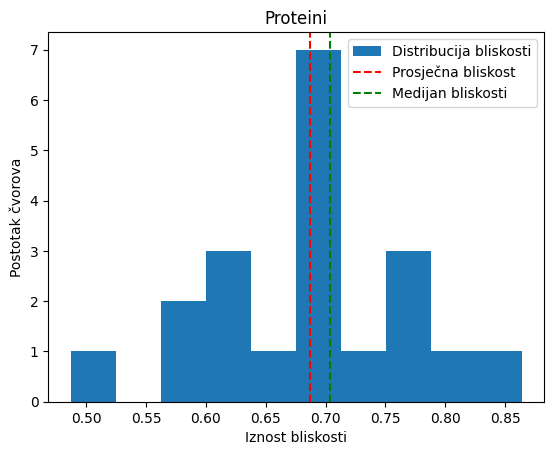

In [64]:
closeness_distribution_plot(c_list_protein, avg_c_protein, med_c_protein, False, 'Proteini')

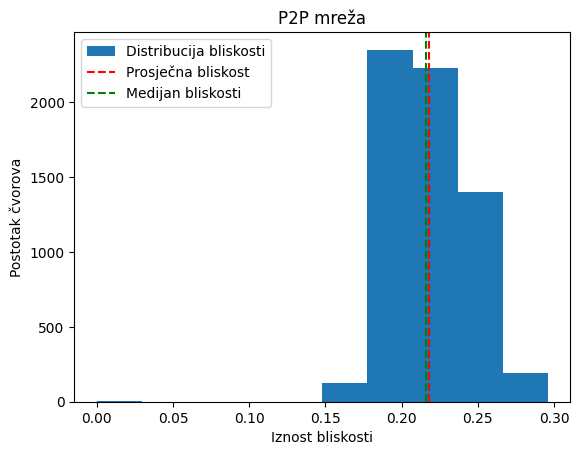

In [65]:
closeness_distribution_plot(c_list_mreza, avg_c_mreza, med_c_mreza, False, 'P2P mreža')

Distribucija međupoloženosti

In [66]:
def calc_betweenness(G):
    betweenness = [val for (node, val) in nx.betweenness_centrality(G).items()]
    avg_betweenness = np.mean(betweenness)
    med_betweenness = np.median(betweenness)
    
    return betweenness, avg_betweenness, med_betweenness

In [67]:
def betweenness_distribution_plot(betweenness_list, avg_betweenness, med_betweenness, cumulative, title):
    plt.hist(betweenness_list,label='Distribucija međupoloženosti', cumulative = cumulative)
    plt.axvline(avg_betweenness,color='r',linestyle='dashed',label='Prosječna međupoloženost')
    plt.axvline(med_betweenness,color='g',linestyle='dashed',label='Medijan međupoloženosti')
    plt.legend()
    plt.ylabel('Postotak čvorova')
    plt.xlabel('Iznos međupoloženosti')
    plt.title(title)      

In [68]:
b_list_karate, avg_b_karate, med_b_karate = calc_betweenness(G_karate)
b_list_protein, avg_b_protein, med_b_protein = calc_betweenness(G_protein)
b_list_mreza, avg_b_mreza, med_b_mreza = calc_betweenness(G_network)

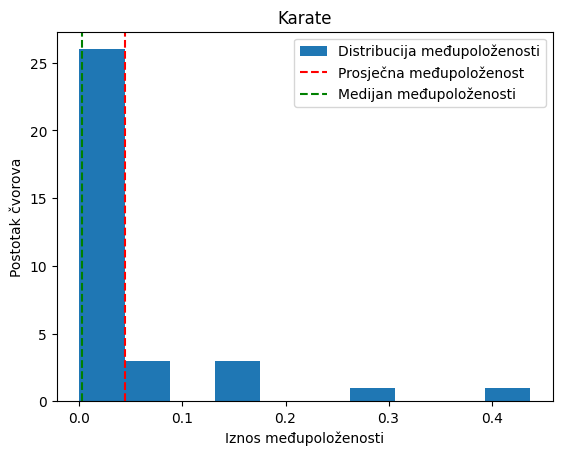

In [69]:
betweenness_distribution_plot(b_list_karate, avg_b_karate, med_b_karate, False, 'Karate')

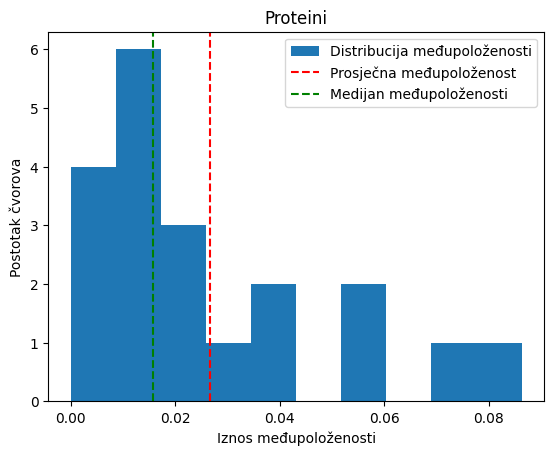

In [70]:
betweenness_distribution_plot(b_list_protein, avg_b_protein, med_b_protein, False, 'Proteini')

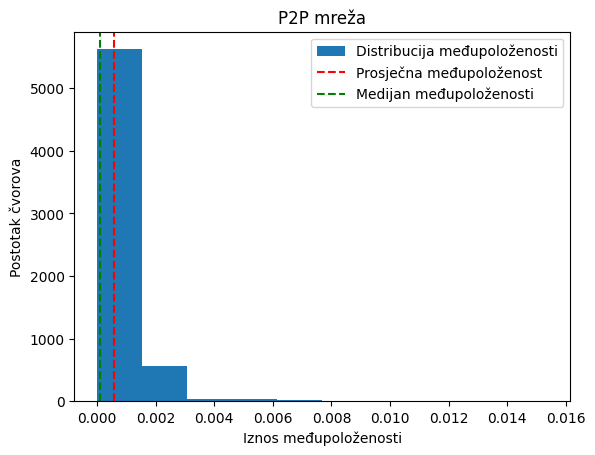

In [71]:
betweenness_distribution_plot(b_list_mreza, avg_b_mreza, med_b_mreza, False, 'P2P mreža')

Heterogenost

In [72]:
def calc_heterogenity(g):
    average_squared_degree = sum([degree**2 for (node, degree) in g.degree()])/g.number_of_nodes()
    average_degree = sum(degree for (node, degree) in g.degree())/g.number_of_nodes()

    heterogenity = average_squared_degree/(average_degree**2)
    
    return heterogenity

In [73]:
print(f"Karate heterogenost : {calc_heterogenity(G_karate)}")
print(f"Proteini heterogenost : {calc_heterogenity(G_protein)}")
print(f"P2P mreža heterogenost : {calc_heterogenity(G_network)}")

Karate heterogenost : 1.693293885601578
Proteini heterogenost : 1.1005382545174933
P2P mreža heterogenost : 2.6770406836436496
